In [142]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

In [143]:
#Read the csv file - using data from 2010-2016 for this example - Salaries are in the 000s
file_path = Path('pitcher_salaries_cleaned_7.csv')
df = pd.read_csv(file_path)
df


,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23.0,185000.0,4.51,246,106,105,16,10,14,635,925.0,0,200.0,75.0,AL,CAL,33
1,1990,AbbottPaul,23.0,100000.0,5.97,37,23,25,0,0,5,104,162.0,0,185.0,75.0,AL,MIN,7
2,1990,AndersonAllan,26.0,300000.0,4.53,214,95,82,20,7,18,566,797.0,0,178.0,71.0,AL,MIN,31
3,1990,AppierKevin,23.0,100000.0,2.76,179,57,127,13,12,8,557,784.0,1,180.0,74.0,AL,KCA,24
4,1990,ArmstrongJack,25.0,107500.0,3.42,151,63,110,9,12,9,498,704.0,1,220.0,77.0,NL,CIN,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,2016,WoodAlex,25.0,530000.0,3.73,56,25,66,5,1,4,181,255.0,0,215.0,76.0,NL,LAN,10
4337,2016,WrightMike,26.0,510500.0,5.79,81,48,50,12,3,4,224,328.0,5,240.0,78.0,AL,BAL,12
4338,2016,WrightSteven,32.0,514500.0,3.33,138,58,127,12,13,6,470,656.0,0,215.0,74.0,AL,BOS,24
4339,2016,YoungChris,37.0,4250000.0,6.19,104,61,94,28,3,9,266,406.0,7,255.0,82.0,AL,KCA,13


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      4341 non-null   int64  
 1   Full Name                 4341 non-null   object 
 2   Age                       4341 non-null   float64
 3   Salary                    4341 non-null   float64
 4   ERA                       4341 non-null   float64
 5   Hits                      4341 non-null   int64  
 6   Earned Runs               4341 non-null   int64  
 7   Strike Outs               4341 non-null   int64  
 8   Home Runs                 4341 non-null   int64  
 9   Wins                      4341 non-null   int64  
 10  Losses                    4341 non-null   int64  
 11  Outs Pitched              4341 non-null   int64  
 12  Batters Faced by Pitcher  4341 non-null   float64
 13  Games Finished            4341 non-null   int64  
 14  Weight  

In [145]:
#look at high salaries
df.sort_values('Salary', ascending = False)

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
4253,2016,KershawClayton,28.0,33000000.0,1.69,97,28,172,8,12,4,447,544.0,0,225.0,76.0,NL,LAN,21
4109,2015,KershawClayton,27.0,32571000.0,2.13,163,55,301,15,16,7,698,890.0,0,225.0,76.0,NL,LAN,33
4238,2016,GreinkeZack,33.0,31799030.0,4.37,161,77,134,23,13,7,476,667.0,0,200.0,74.0,NL,ARI,26
4292,2016,PriceDavid,31.0,30000000.0,3.99,227,102,228,30,17,9,690,951.0,0,215.0,77.0,AL,BOS,35
4177,2015,VerlanderJustin,32.0,28000000.0,3.38,113,50,113,13,5,8,400,535.0,0,235.0,77.0,AL,DET,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1991,RhodesArthur,22.0,100000.0,8.00,47,32,23,4,0,3,108,174.0,0,220.0,74.0,AL,BAL,8
234,1991,MelendezJose,26.0,100000.0,3.27,77,34,60,11,8,5,281,381.0,10,175.0,74.0,NL,SDN,9
139,1990,WestDavid,26.0,100000.0,5.10,142,83,92,21,7,9,439,646.0,0,205.0,78.0,AL,MIN,27
73,1990,KutzlerJerry,25.0,100000.0,6.03,38,21,21,2,2,1,94,141.0,0,175.0,73.0,AL,CHA,7


In [146]:
#Cleaning data - League
df['League'].value_counts()

NL    2243
AL    2098
Name: League, dtype: int64

In [147]:
#Cleaning data - Full Name and Team
df=df.drop(["Full Name","Team"],1)
df

,Year,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Games Started
0,1990,23.0,185000.0,4.51,246,106,105,16,10,14,635,925.0,0,200.0,75.0,AL,33
1,1990,23.0,100000.0,5.97,37,23,25,0,0,5,104,162.0,0,185.0,75.0,AL,7
2,1990,26.0,300000.0,4.53,214,95,82,20,7,18,566,797.0,0,178.0,71.0,AL,31
3,1990,23.0,100000.0,2.76,179,57,127,13,12,8,557,784.0,1,180.0,74.0,AL,24
4,1990,25.0,107500.0,3.42,151,63,110,9,12,9,498,704.0,1,220.0,77.0,NL,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,2016,25.0,530000.0,3.73,56,25,66,5,1,4,181,255.0,0,215.0,76.0,NL,10
4337,2016,26.0,510500.0,5.79,81,48,50,12,3,4,224,328.0,5,240.0,78.0,AL,12
4338,2016,32.0,514500.0,3.33,138,58,127,12,13,6,470,656.0,0,215.0,74.0,AL,24
4339,2016,37.0,4250000.0,6.19,104,61,94,28,3,9,266,406.0,7,255.0,82.0,AL,13


In [148]:
#encode data
df=pd.get_dummies(df,columns=['League'], prefix="League")
df

,Year,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,League_AL,League_NL
0,1990,23.0,185000.0,4.51,246,106,105,16,10,14,635,925.0,0,200.0,75.0,33,1,0
1,1990,23.0,100000.0,5.97,37,23,25,0,0,5,104,162.0,0,185.0,75.0,7,1,0
2,1990,26.0,300000.0,4.53,214,95,82,20,7,18,566,797.0,0,178.0,71.0,31,1,0
3,1990,23.0,100000.0,2.76,179,57,127,13,12,8,557,784.0,1,180.0,74.0,24,1,0
4,1990,25.0,107500.0,3.42,151,63,110,9,12,9,498,704.0,1,220.0,77.0,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,2016,25.0,530000.0,3.73,56,25,66,5,1,4,181,255.0,0,215.0,76.0,10,0,1
4337,2016,26.0,510500.0,5.79,81,48,50,12,3,4,224,328.0,5,240.0,78.0,12,1,0
4338,2016,32.0,514500.0,3.33,138,58,127,12,13,6,470,656.0,0,215.0,74.0,24,1,0
4339,2016,37.0,4250000.0,6.19,104,61,94,28,3,9,266,406.0,7,255.0,82.0,13,1,0


In [149]:
#calculations
df["Salary"].describe()

count    4.341000e+03
mean     3.230609e+06
std      4.387802e+06
min      1.000000e+05
25%      3.775000e+05
50%      1.290000e+06
75%      4.333333e+06
max      3.300000e+07
Name: Salary, dtype: float64

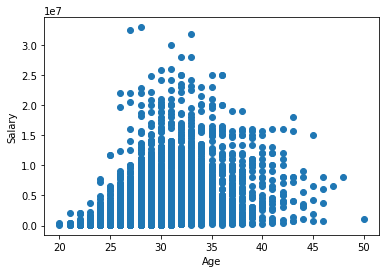

In [150]:
#Graph relationship using regression-Age is just being used to do a simple model
#If data does not look like the sample below - will use 
plt.scatter(df.Age, df.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


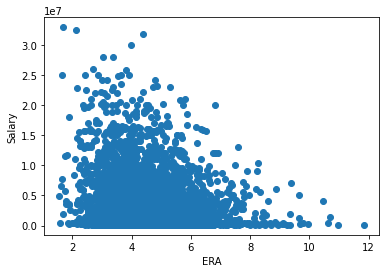

In [151]:
#Graph relationship using regression-ERA is just being used to do a simple model
#If data does not look like the sample below - will use 
plt.scatter(df.ERA, df.Salary)
#plt.gca().invert_xaxis()
plt.xlabel('ERA')
plt.ylabel('Salary')
plt.show()


In [152]:
X = df.loc[:,'ERA'].values

In [153]:
X[:10]

array([4.51, 5.97, 4.53, 2.76, 3.42, 4.93, 4.  , 3.6 , 3.53, 5.24])

In [154]:
y = df.loc[:,'Salary'].values

In [155]:
y[:10]

array([ 185000.,  100000.,  300000.,  100000.,  107500.,  200000.,
        450000.,  130000.,  775000., 1175000.])

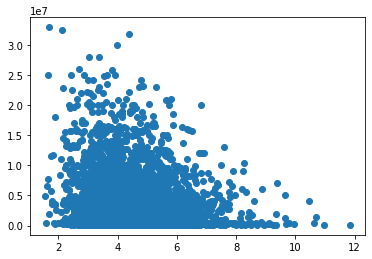

In [156]:
plt.scatter(X, y)
plt.show()

In [157]:
fit = np.polyfit(np.log(X), y, 1)

In [158]:
print(fit)

[-2942752.04114977  7540313.5414443 ]


In [159]:
# results mean we can predict x using the fitted log regression equation y = 7540313.5414443 - 2942752.04114977*ln(X)
#Test an ERA
Salary_predict= 7540313.5414443 - 2942752.04114977 * np.log(12)
print(Salary_predict)

227849.42571402527


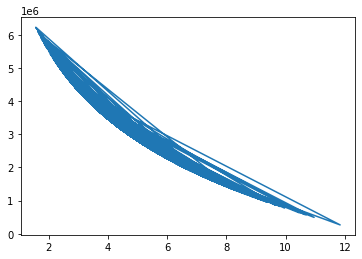

In [182]:
X2 = df.loc[:,'ERA'].values.reshape(-1, 1)
yA = 2942752.04114977 * np.log(X2) 
y2 = 7540313.5414443 - yA
plt.plot(X2,y2)


In [183]:
# Split the preprocessed data into a training and testing dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)

In [184]:
# Create a model with scikit-learn
model = LinearRegression()

In [186]:
#X2 = X2.values.reshape(-1, 1)
#y2 = y2.values.reshape(-1, 1)

In [187]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
#model.fit(X, y)

In [188]:
model.fit(X2_train, y2_train)
training_score = model.score(X2_train, y2_train)
testing_score = model.score(X2_test, y2_test)

print(f"Training Score: {training_score*100:.2f}%")
print(f"Testing Score: {testing_score*100:.2f}%")

Training Score: 96.07%
Testing Score: 95.85%


In [189]:
print('slope:', model.coef_)


slope: [[-634151.68819983]]


In [190]:
# The model creates predicted y values based on X values
y2_pred = model.predict(X2)
print(y2_pred.shape)

(4341, 1)


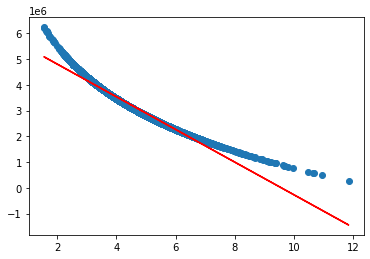

In [191]:
# Plot the results. The best fit line is red.
plt.scatter(X2, y2)
#plt.gca().invert_xaxis()
plt.plot(X2, y2_pred, color='red')
plt.show()

In [192]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[[-634151.68819983]]
[6070752.48789559]


In [193]:
lin_reg = LinearRegression()
lin_reg.fit(X2,y2)

LinearRegression()

In [194]:
#Linear Regression prediction Test
lin_reg.predict([[8]])

array([[988570.76856827]])